# Stylized Facts of Financial Returns

Understanding why financial time series behave differently from typical machine learning datasets, and why many ML models fail when applied to markets.


## Introduction

Financial markets exhibit statistical properties that differ significantly from the assumptions commonly made in standard machine learning models.
While many ML techniques implicitly rely on normality, stationarity, and stable relationships, financial returns violate these assumptions in systematic ways.

This notebook explores some of the most well-known *stylized facts* of financial returns, such as non-normality, heavy tails, and volatility clustering.
The goal is not to build a predictive model, but to understand the empirical behavior of returns and explain why applying machine learning to financial markets is inherently challenging.

Understanding these properties is a prerequisite for building robust financial ML systems.


## Data and Returns

We use historical price data from a liquid financial asset to illustrate the empirical properties of financial returns.
Rather than modeling prices directly, we focus on *log-returns*, which are more suitable for statistical analysis and closer to stationarity.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use("default")


In [2]:
!pip install yfinance


In [3]:
import yfinance as yf

symbol = "^GSPC"  # S&P 500
data = yf.download(symbol, start="2000-01-01", progress=False)

data.head()


/tmp/ipython-input-4265443591.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, start="2000-01-01", progress=False)


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [5]:
data.columns


MultiIndex([( 'Close', '^GSPC'),
            (  'High', '^GSPC'),
            (   'Low', '^GSPC'),
            (  'Open', '^GSPC'),
            ('Volume', '^GSPC')],
           names=['Price', 'Ticker'])

In [6]:
prices = data["Close"]

returns = np.log(prices / prices.shift(1)).dropna()

returns.head()


Ticker,^GSPC
Date,
2000-01-04,-0.039099
2000-01-05,0.001920
2000-01-06,0.000955
2000-01-07,0.026730
2000-01-10,0.011128


In [8]:
returns_clean = returns.replace([np.inf, -np.inf], np.nan).dropna()
returns_clean = returns_clean.values  # convertir a numpy array


In [11]:
returns_clean = returns_clean.flatten()


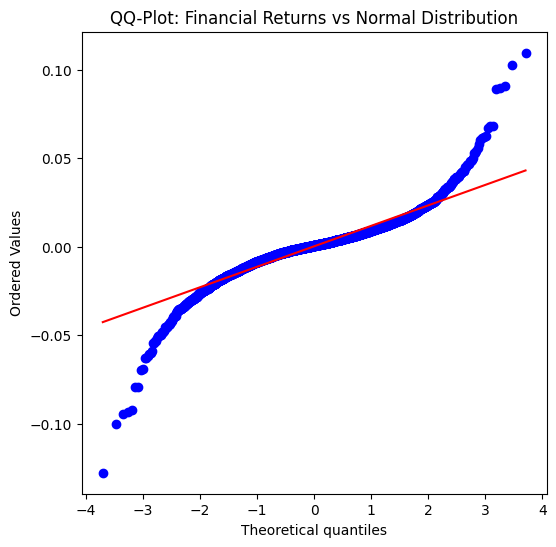

In [12]:
plt.figure(figsize=(6, 6))
stats.probplot(returns_clean, dist="norm", plot=plt)
plt.title("QQ-Plot: Financial Returns vs Normal Distribution")
plt.show()


The QQ-plot shows that while small returns are approximately Gaussian, the tails deviate significantly from normality.
This indicates the presence of heavy tails, meaning that extreme events occur far more frequently than predicted by a normal distribution.
Such behavior invalidates many standard statistical assumptions used in traditional machine learning models.


## Volatility Clustering

A well-known stylized fact of financial returns is volatility clustering.
Periods of high volatility tend to be followed by high volatility, and periods of low volatility tend to persist, even though returns themselves are largely unpredictable.


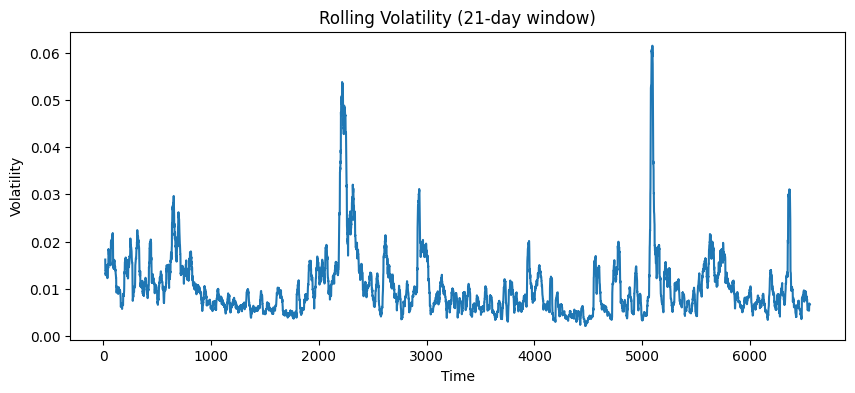

In [13]:
rolling_vol = pd.Series(returns_clean).rolling(window=21).std()

plt.figure(figsize=(10, 4))
plt.plot(rolling_vol)
plt.title("Rolling Volatility (21-day window)")
plt.ylabel("Volatility")
plt.xlabel("Time")
plt.show()


The rolling volatility plot reveals clear volatility clustering.
Although returns themselves exhibit little autocorrelation, the magnitude of returns is highly persistent over time.
This property explains why volatility models and regime-aware machine learning approaches are more suitable for financial data than naive predictive models.


## Implications for Machine Learning in Finance

The empirical properties observed in this notebook help explain why many machine learning models fail when applied directly to financial returns.
Low signal-to-noise ratios, non-stationary volatility, and heavy-tailed distributions require specialized modeling approaches, careful validation, and strong domain knowledge.
